# One-Dimensional Heat Condution in a Wire with Electrical Heat Source and Insulation
Code author: Dr. Robert Hesketh, hesketh@rowan.edu

## Shooting Method for Split Boundary Value Problem

Source: Problem 9.2 in Problem Solving in Chemical and Biochemical Engineering with POLYMATH, Excel, and MATLAB (2nd Edition), Publisher: Prentice Hall PTR; (September 22, 2007) ISBN-10: 0131482041 or ISBN-13: 978-0131482043, by Michael B. Cutlip and Mordechai Shacham.

(a) Calculate and plot the temperature and heat flux within the wire if the wire surface is maintained at $T_1 = 15°C = 288.15 K$, and the electrical and thermal conductivities are given by $k_e = 1.4 \times 10^5\exp(0.0035T) \;ohm^{-1}m^{-1}$ and $k = 5 W/m·K$. The wire radius is $R_1 = 0.004 m$ and the
total current is maintained at the current is 400 amps.


(b) The wire surface has a heat transfer coefficient due to natural convection given by $h = 1.32\left(\frac{|\Delta T|}{D}\right)^{1/4}$, where $h$ is in $W/m^2·K$, $\Delta T$ is in K, and $D$ is in m. Calculate the heat flux at the wire surface and plot the temperature distribution within the wire. The temperature of the surroundings is $T_b$ = 15 °C = 288.15 K. The wire radius is $R_1 = 0.004 m$ and the total current is maintained at $i = 50 amps$.


(c) The wire with $i = 50 amps$ is covered by an insulating layer whose outer radius is $R_2 = 0.015 m$ and whose constant thermal conductivity is $k_I = 0.2 W/m·K$. Calculate the heat flux at the exterior surface of the insulation and plot the temperature distribution within the wire and the insulation layer. Comment on the use of insulation in this application.

# Objectives
 - Numerically solve a second order ODE with a split boundary condition.
 - Derive the energy balance for a wire with heat generation and conduction through the cylinderical walls.
 - Modify the C&S10.1 template to solve a this problem.
 - Explain to another student how the secant method is the same as 2 guesses and manual interpolations for the remaining trials
 - Explain to a first year chemical engineering student how a while loop works.
 - Write a simple program that contains a while loop 
 

# Procedure

1.   Derive differential equations for the model of your system (e.g. dy/dt=a-b*t)
2.   Create a function in python that contains the differential equations (e.g. dy/dt=a-bt) 
3. The function name is defined using <font color='green'> **def** </font> <font color='blue'>**FUNCTIONname**</font> (t,Yfuncvec):
4. We will use ODEfun for the FUNCTIONname. After the function name and within parenthesis you then list the variables passed into the function: t and Yfuncvec.
5. In the first line of code you will unpack the y vector (which in this example is $T$ and $Q_r$)  T = Yfuncvec(0) and Qr = Yfuncvec(1) This allows you to use the variable names T and Qr in the equations that define the two differential equations using typed variables. (e.g. dTdr = -Qr/k  and  drQrdr = qdot*r)
6. Create an array of the values of the derivatives defined above. ( e.g. dYfuncvecdt = [dTdr; drQrdr]) Again for this case we have 2 derivatives
7. End the function with the line command <font color='green'> **return** dYfuncvecdt </font> 
8. Give the initial conditions (e.g. at r=0 what is $T|_{r=0}$ and $Q|_r{r=R}) for tspan=[0,R]
9. Give the initial values of the "y" variables in y0. 


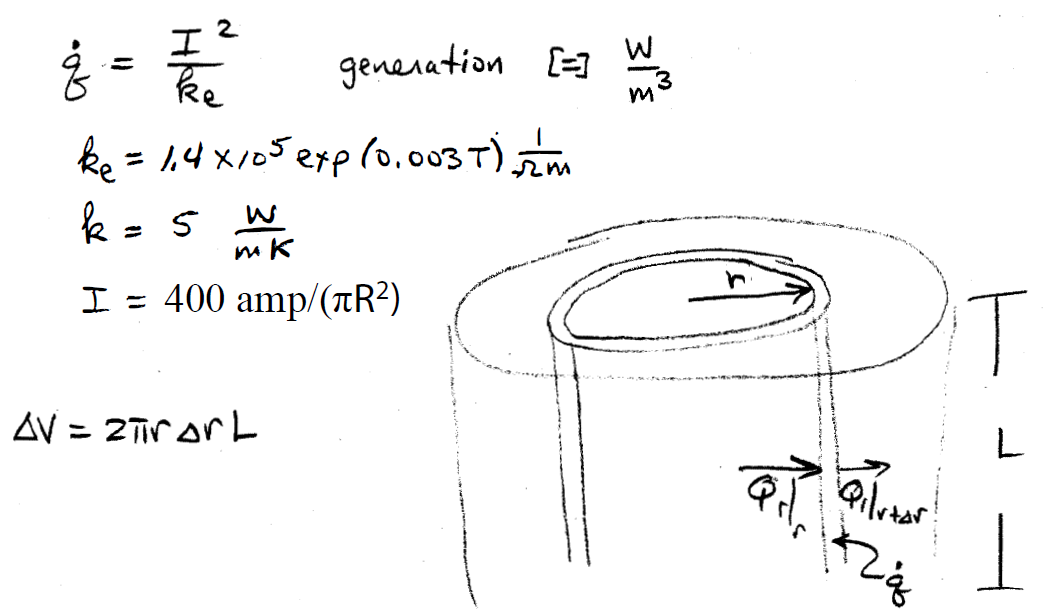

# Derivations
An insulated wire is carrying an electrical current that causes a heat generation term according to the following equation
$$\dot{q} = \frac{I^2}{k_e} [=] \frac{W}{m^3}  	\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;(1)$$
Remember that the units of $W [=] \frac{J}{s}$ and $I$ is the current density in $\text{amps}$/${\text{m}^2}$.   The electrical conductivity is $k_e = \frac{1.4\times10^5}{ohm\; m}*exp(\frac{0.003}{K}*T)$  and $k_e$ has units $\frac{1}{ohm\; m}$<br>
Using a control volume within the solid shown in the figure above of $\Delta V=2\pi r \Delta r L$ an energy balance in the $r$ direction gives<br>
### Differential energy Balance in r direction

$$\Delta V \frac{\partial \left( \rho C_p T\right)}{\partial t}=Q_r 2 \pi r L|_r-Q_r 2 \pi r L|_{r+\Delta r} +\dot{q}\Delta V  	\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;(2)$$	 	
Dividing by the control volume 
	$$\frac{\partial \left( \rho C_p T\right)}{\partial t} =\frac{Q_r 2 \pi r L|_r-Q_r 2 \pi r L|_{r+\Delta r} +\dot{q}2 \pi r \Delta r L  }{\Delta V }\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;(3)$$

Changing the numerator to always have the $r+\Delta r$ term first and then taking the limit to remove the $\Delta 's$ and obtain a partial derivative:
	$$\frac{\partial \left( \rho C_p T \right)}{\partial t} = \frac{-1}{2 \pi r L}\left(\frac{Q_r 2 \pi r L|_{r+\Delta r}-Q_r 2 \pi r L|_r} { r+ \Delta r -r} \right)+\frac{\dot{q}2 \pi r \Delta r L}{2 \pi r \Delta r L}\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;(4)$$

Taking the limit and removing anything in the derivative that is constant with respect to the partial derivative gives
$$  \frac{\partial \left( \rho C_p T \right)}{\partial t} = -\frac{1}{r}\left(\frac{\partial (Q_r r)} {  \partial r} \right)+\dot{q}\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;(5)$$

At steady-state $$\frac{\partial (Q_r r)} {  \partial r} =\dot{q}r\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;(6)$$

The constitutive equation for heat transfer is
 
$$Q_r=-k\frac{\partial T}{\partial r}	\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;(7)$$
Which we will re-arrange to give our second ODE to give
$$\frac{\partial T}{\partial r}=-\frac{Q_r}{k}	\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;(8)$$

Equations (6) and (8) could be combined into a second order differential equation for $T$ with respect to $r$, but for a numerical solution you need ODE's. 
We will need an initial condition for each ODE.  At $r=0$ we don't know the $T$ but the term $rQ_r$ is zero since $r=0$. At $r=R1$ we are told that the temperature is maintained at $T_1 = 15$°C (288 .15 K)  This results in split boundary condition with respect to $T$ similar to that of C&S 10.1 



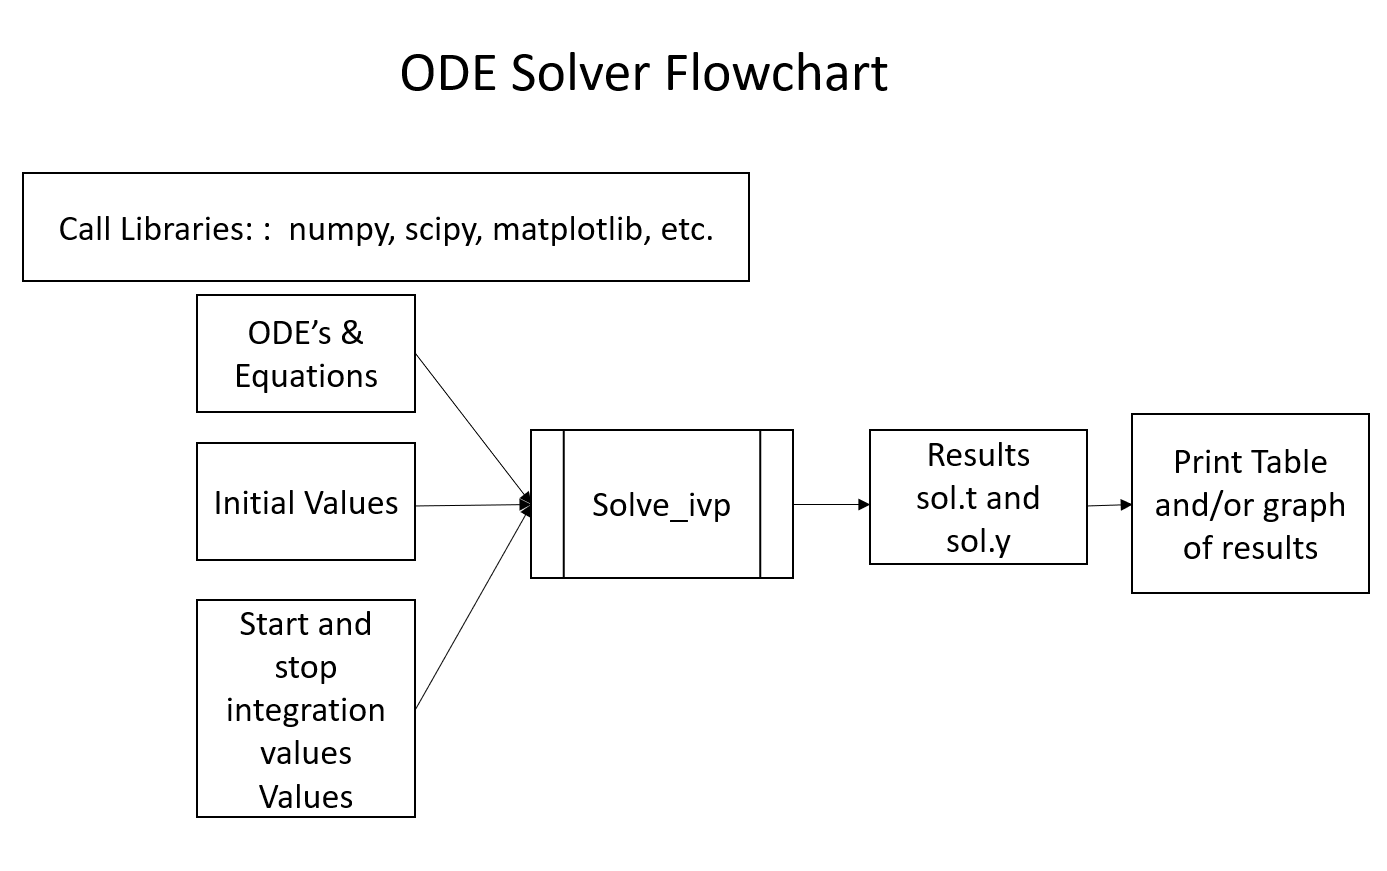

## Begin the code by calling the libraries that you will use

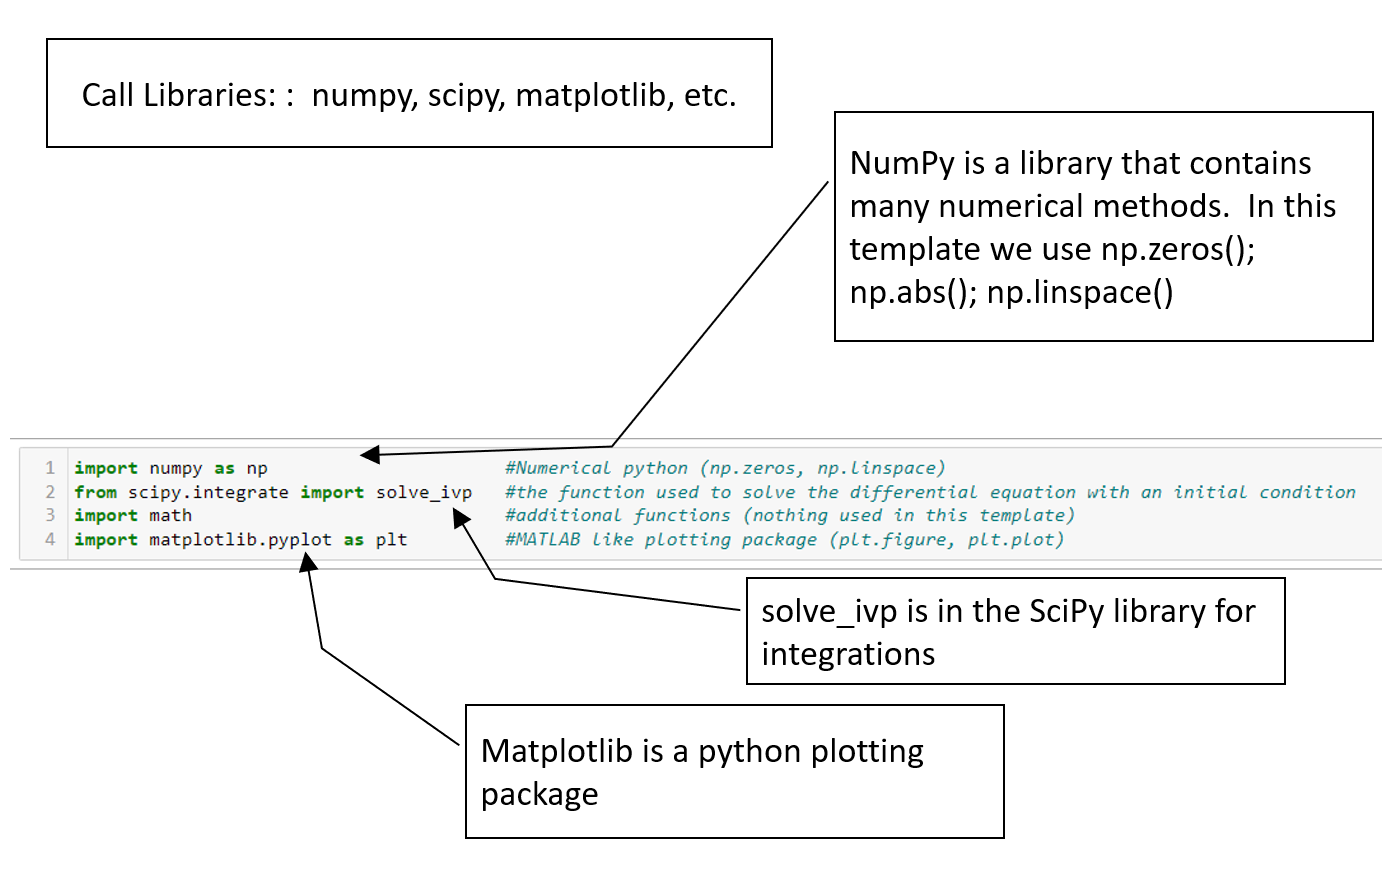

In [26]:
#These are imports that we need to be able to run the ODE solver and plot the results.
#ivp stands for initial value problem.
import numpy as np
from scipy.integrate import solve_ivp
import math
import matplotlib.pyplot as plt

## Put Equations in Function
The next step is to write the equations that we derived in the first cell into a function that we call ODEfun

### The cell below is the python function!

In [27]:
# This code defines the functions to calculate the differential equations described above in (6) and (8)
def  ODEfun(r,Yfuncvec):
    T= Yfuncvec[0] 
    rQr = Yfuncvec[1] 
    
    if r>0:
      Qr=rQr/r
    else:
      Qr=0
    k = 5.
    ke =1.4e5*np.exp(0.0035*T)
    R1 = .004
    I = 400/(np.pi*R1**2)
    qdot = I**2/ke
    D = 2*R1
            
    dTdr = -Qr/k 
    drQrdr = qdot*r
    
    dYfuncvecdr = [dTdr, drQrdr] 
    return dYfuncvecdr

# Split Boundary Value Problem  You need to Guess the temperature at the center of the wire.


## Estimate the initial value of $T|_{r=0}$
The cell below gives the initial value of value of T based on a fake integration of $$\frac{\partial (Q_r r)} {  \partial r} =\dot{q}r$$ as
$$ Q_r   =\dot{q}R_1/2$$
We will assume that $\dot{q}$ is constant and use $T=288.15K$ in the equation for $k_e$.  and then fake integrating 
$$\frac{\partial T}{\partial r}=-Q_r/k	$$ to give 
$$\frac{T|_{r=0}-288K}{0.004m}=Q_r/k=	\dot{q}R_1/2/k$$
To estimate the value of $\dot{q}$ we will

In [28]:
#estimating a starting value of the center temperature
ke=1.4e5*np.exp(0.0035*288.15)
R1=0.004
I = 400/(3.1416*R1**2)
qdot=I**2/ke
Temp_est=qdot*0.002/5*0.004+288

print('Test=',Temp_est)
print('qdot=',qdot)
print('I=',I)


Test= 551.9814107368684
qdot= 164988381.71054274
I= 7957728.545963841


This cell below defines the integration interval and the initial values of the variables in the differential equation

In [29]:
y0 = [Temp_est, 0] # Initial values for the dependent variables 
tspan = [0, 0.004] # Range for the independent variable 

## Test the ODEfun
The cell below will test ODEfun to see if there are any errors

In [30]:
#test of function ODEfun with the equilibrium vapor pressure yAeq and the initial flux guess NAest calculated above.  

sol=ODEfun(0.00,y0) #This line calls the ODEfun and sends the values r=0 and y0=[T, rQr]
print (sol)
print(y0)

[0.0, 0.0]
[551.9814107368684, 0]


The above result without any errors shows that the ODEfun is working!
 

## Integrate the ODE's
In the cell below we will solve the 2 differential equations using our first guess of $T|_{r=0}$ at $r=0$.  But we will find that this is not the correct initial condition!


In [31]:
# Here we're going to use the function solve_ivp to integrate the differential equations in ODEfun for r from 0 to 0.004 m
y0 = [Temp_est, 0] # Initial values for the dependent variables 
tspan = [0, 0.004] # Range for the independent variable 
sol=solve_ivp(ODEfun,tspan,y0)#solve the ODE 
print(sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 32
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 1.00000000e-04, 4.00520918e-04, 1.19305311e-03,
       2.75632080e-03, 4.00000000e-03])
 t_events: None
        y: array([[5.51981411e+02, 5.51948646e+02, 5.51455581e+02, 5.47298727e+02,
        5.26531380e+02, 4.96997927e+02],
       [0.00000000e+00, 3.27656242e-01, 5.26069928e+00, 4.70185189e+01,
        2.60238780e+02, 5.77152217e+02]])
 y_events: None


The results shown in the 2 solution arrays above show the t and y variables.  Since I set the solution to equal the
array named sol. The the solve_ivp function stores these into a sol.t array and a sol.y array.  The sol.t array stores the values of r used. (Remember the solve_ivp assumes that the independent variable is called t, but we are using r!)
You can see that t (r for us) goes from 0 to 0.004 m.  From the center of the wire to the bare wire surface r=R1.

The sol.y array has the values of $T$ (first row) and $rQr$ (second row).  
$T$ increases from the value you specified to a lower temperature at the wire surface.  Is it the correct surface Temperature.  In part a of the problem it is stated that the surface temperature is 288.15K.  Did you get close?

We need a second guess for T at r=0, and then we'll interpolate to find a value that gets $T$ to equal 288.15K at the bare wire surface. Because our first guess of the core temperature resulted in too high a surface temperature let's use 0.5 times the Temp_est as our second guess.  Below is our second
$T|_{r=0}$ guess.

In [32]:
#Second Guess:
Temp_est2= Temp_est*0.5  #Replace this with your new guess and run (ctrl enter) 
tspan = [0, 0.004] # Range for the independent variable 
y0 = [Temp_est2, 0] # Initial values for the dependent variables 
print('Test2=',Temp_est2)

sol=solve_ivp(ODEfun,tspan,y0)#solve the ODE 
print(sol)

Test2= 275.9907053684342
  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 38
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 1.00000000e-04, 3.47639423e-04, 9.56035183e-04,
       2.08750879e-03, 3.82309943e-03, 4.00000000e-03])
 t_events: None
        y: array([[2.75990705e+02, 2.75904617e+02, 2.74949435e+02, 2.68068130e+02,
        2.37191722e+02, 1.33905055e+02, 1.18426752e+02],
       [0.00000000e+00, 8.60940680e-01, 1.04221429e+01, 7.97757583e+01,
        4.01433722e+02, 1.61275239e+03, 1.81401087e+03]])
 y_events: None


# Interpolation: Smart guessing or systematic root finding!

Interpolate between these two values to try to get T|_r=0.004=288.15K on your next guess.  So your 2 pairs of points are in the format of 
(T|r=0,T|r=0.004)  or you could define an error function and then look for when it is zero.  You could use err=T-288.15.  Then put the last or the surface temperature into this equation.

In [33]:
err1=4.96997927e+02-288.15
err2=sol.y[0,-1]-288.15
print('err1=',err1,'err2=',err2)
118.4-288.15# check on line 2

err1= 208.84792700000003 err2= -169.7232482359491


-169.74999999999997

As you can see by the above graph our first estimate nearly gave us the answer of zero.  Next you will interpolate to find the next value of NA|z=0 given by the intersection of the dashed line and blue lineInterpolation.  This is done using the following interpolation formula: 
$$\frac{(y_1 - y_2)}{(x_1-x_2)}=\frac{(y_1 - 0)}{(x_1-x)}$$
Solving for x gives
$$x=x_1-y_1\frac{(x_1-x_2)}{(y_1 - y_2)}$$
So your next guess should be
$$x=Temp_{est}-err1*\frac{(Temp_{est}-Temp_{est2})}{(err1- err2)}$$


In [34]:
x=Temp_est-err1*(Temp_est-Temp_est2)/(err1- err2)
Temp_est3=x
print('Temp_est3=',x)

Temp_est3= 399.72447608900364


In [35]:
#This should be your 3rd trial.  run solve_ivp with the new values of y0.  Remember your ODEfun specifies the order of y0
x=Temp_est3
y0 = [x, 0] # Initial values for the dependent variables 

sol=solve_ivp(ODEfun,tspan,y0)#solve the ODE 
print(sol)
err3=sol.y[0,-1]-288.15
print('err3=',err3)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 32
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 1.00000000e-04, 3.70074466e-04, 1.05469113e-03,
       2.36246915e-03, 4.00000000e-03])
 t_events: None
        y: array([[3.99724476e+02, 3.99668648e+02, 3.98959409e+02, 3.93480611e+02,
        3.67685622e+02, 3.02602958e+02],
       [0.00000000e+00, 5.58304540e-01, 7.65575935e+00, 6.27798605e+01,
        3.29518870e+02, 1.05857497e+03]])
 y_events: None
err3= 14.452958399710951


In [36]:
#This should be your 4rd trial
#replace one of the pairs of points with you new point from the above solution
#I have replaced the first guess since that had the biggest error
Temp_est=Temp_est3
err1=err3
x=Temp_est-err1*(Temp_est-Temp_est2)/(err1- err2)
print('Temp_est4=',x)

Temp_est4= 390.0146494315275


In [37]:
Temp_est4=x
y0 = [x, 0] # Initial values for the dependent variables 

sol=solve_ivp(ODEfun,tspan,y0)#solve the ODE 
print(sol)
err4=sol.y[0,-1]-288.15
print('Temp_est=',x,'err4=',err4)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 32
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 1.00000000e-04, 3.68242086e-04, 1.04652709e-03,
       2.33952830e-03, 4.00000000e-03])
 t_events: None
        y: array([[3.90014649e+02, 3.89956891e+02, 3.89230941e+02, 3.83653913e+02,
        3.57495348e+02, 2.89222339e+02],
       [0.00000000e+00, 5.77606215e-01, 7.84242312e+00, 6.39615041e+01,
        3.34601932e+02, 1.10221027e+03]])
 y_events: None
Temp_est= 390.0146494315275 err4= 1.0723385256846996


In [38]:
#This should be your 5rd trial (The result of this trial should have yA|z=L < 1e-6)


This is too slow!  Let's go to the automated plan.

# Automate this process with a while loop
We could always do these series of interpolations by hand, but wouldn't it be better to automate this process? The mathematical technique that we were using with interpolations is called the secant method.  It looks at the results of the last two guesses, and makes a new estimate based on how close the previous guesses were to the target.  If the problem was linear, it would find the correct solution on the third guess.  For a non-linear problem, it will still get to the solution, but it will take a few iterations to find it.  Remember that we're guessing our Temperature at the center of the wire $T|_{r=0}$ , and our target is to get $T$ to be equal to 288.15K or $err=T|_{r=0}-288.15K=0$ after integrating r from 0 to 0.004 meters.

To find the correct value for $T$, we will start using the same 2 initial guesses of the value of $ T |_{r=0}$.  The result for each T guess will be calculated after integrating. At $r=0.004 m$ we want the value of $T|_{r=0.004}-288.15K$ to be zero. The difference between our result and 288.15K is the error for that guess.
$$err(T)= T|_{r=0.004} -288.15K$$ 
Of course the desired result is to have zero error which in computer language is an error value less than 1e-6 $(1\times 10^{-6})$
After the first two guesses, we can make a good third trial (and after that a fourth one, and so on) by using the secant method or linear interpolation.  

In this case the pairs of points are the two guesses for $T|_{r=0}$ and the two resulting values for $err$. 

$$T|_{r=0_{k+1}}=T|_{r=0_k}-err_k\frac{ T|_{r=0_k}-T|_{r=0_{k-1}} } {err_k-err_{k-1}}$$
Again, two initial values or guesses of $T|_{r=0}$ are needed.

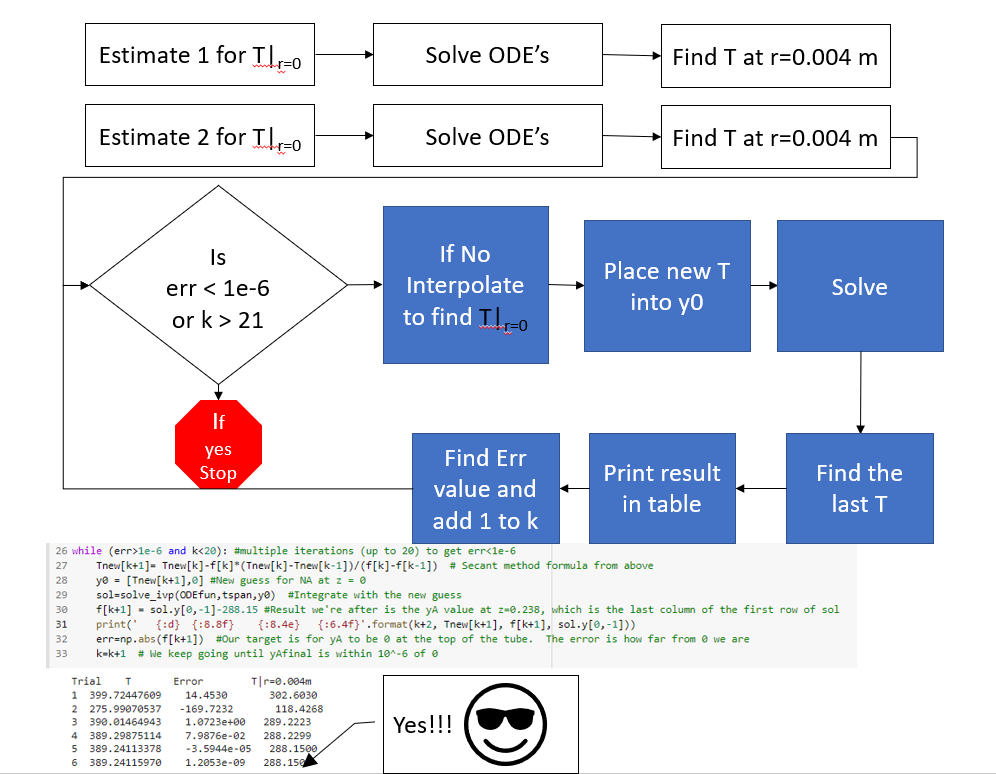

In [39]:
#Test Cell
tspan = [0, 0.004] # Range for the independent variable 

#initialize arrays
Tnew=np.zeros(21)
f=np.zeros(21)
#input the first 2 guesses for the secant method

Tnew[0]=Temp_est
Tnew[1]=Temp_est2 #We could have just put NAest*1.2 or NAest/2 etc to get a second guess

k=0 #python starts arrays at 0
y0 = [Tnew[k],0]# Initial values for the dependent variables
sol=solve_ivp(ODEfun,tspan,y0)#solve the ODE with first guess
f[k] = sol.y[0,-1]-288.15
print('   Trial    T       Error        T|r=0.004m')
print('   {:d}  {:8.8f}   {:8.4f}       {:6.4f}'.format(k+1, Tnew[k], f[k], sol.y[0,-1]))

k=1 #python starts arrays at 0
y0 = [Tnew[k],0]
sol=solve_ivp(ODEfun,tspan,y0)#solve the ODE with second guess
f[k] = sol.y[0,-1]-288.15
print('   {:d}  {:8.8f}   {:8.4f}       {:6.4f}'.format(k+1, Tnew[k], f[k], sol.y[0,-1]))
err=np.abs(f[k])

while (err>1e-6 and k<20): #multiple iterations (up to 20) to get err<1e-6
    Tnew[k+1]= Tnew[k]-f[k]*(Tnew[k]-Tnew[k-1])/(f[k]-f[k-1])  # Secant method formula from above
    y0 = [Tnew[k+1],0] #New guess for NA at z = 0
    sol=solve_ivp(ODEfun,tspan,y0,xtol=1e-8)  #Integrate with the new guess
    f[k+1] = sol.y[0,-1]-288.15 #Result we're after is the yA value at z=0.238, which is the last column of the first row of sol
    print('   {:d}  {:8.8f}    {:8.4e}   {:6.4f}'.format(k+2, Tnew[k+1], f[k+1], sol.y[0,-1]))
    err=np.abs(f[k+1])  #Our target is for yA to be 0 at the top of the tube.  The error is how far from 0 we are
    k=k+1  # We keep going until yAfinal is within 10^-6 of 0

   Trial    T       Error        T|r=0.004m
   1  399.72447609    14.4530       302.6030
   2  275.99070537   -169.7232       118.4268
   3  390.01464943    1.0723e+00   289.2223
   4  389.29875114    7.9876e-02   288.2299
   5  389.24113378    -3.5944e-05   288.1500
   6  389.24115970    1.2052e-09   288.1500


# Let's make a table of Results

In [40]:
#printing of the results
NumPoints=20 #put the number of points needed for table (rows) and plots
teval=np.linspace(tspan[0],tspan[1],NumPoints)
sol=solve_ivp(ODEfun,tspan,y0,t_eval=teval) 

print('           Summary of Results\n')

print('   r         T        rQ           Q')
print('  (m)       (K)    (m W/m^2)     (W/m^2)  ')

Q=np.zeros(NumPoints)
row=0
for row in range(NumPoints):
    if sol.t[row]==0:
      Q[row]=0
    else:  
      Q[row] = sol.y[1,row]/sol.t[row] 
   
    print('{:4.4f} {:10.2f} {:8.1f} {:12.2e}'.format(sol.t[row],sol.y[0,row],sol.y[1,row],Q[row] ))

           Summary of Results

   r         T        rQ           Q
  (m)       (K)    (m W/m^2)     (W/m^2)  
0.0000     389.24      0.0     0.00e+00
0.0002     388.98      2.6     1.22e+04
0.0004     388.21     10.3     2.44e+04
0.0006     386.93     23.2     3.67e+04
0.0008     385.12     41.4     4.91e+04
0.0011     382.79     64.9     6.17e+04
0.0013     379.93     93.9     7.44e+04
0.0015     376.52    128.6     8.73e+04
0.0017     372.57    169.1     1.00e+05
0.0019     368.06    215.7     1.14e+05
0.0021     362.98    268.7     1.28e+05
0.0023     357.31    328.4     1.42e+05
0.0025     351.03    395.2     1.56e+05
0.0027     344.13    469.4     1.72e+05
0.0029     336.58    551.6     1.87e+05
0.0032     328.36    642.4     2.03e+05
0.0034     319.44    742.4     2.20e+05
0.0036     309.79    852.3     2.38e+05
0.0038     299.37    973.1     2.57e+05
0.0040     288.15   1105.8     2.76e+05


# Heat loss at the surface of the wire assuming the wire has a length of 1m.

In [41]:
heatLoss=Q[-1]*np.pi*0.004*1
print('heat loss',heatLoss,'W')

heat loss 3473.8946065328128 W


# Plots of the data.  


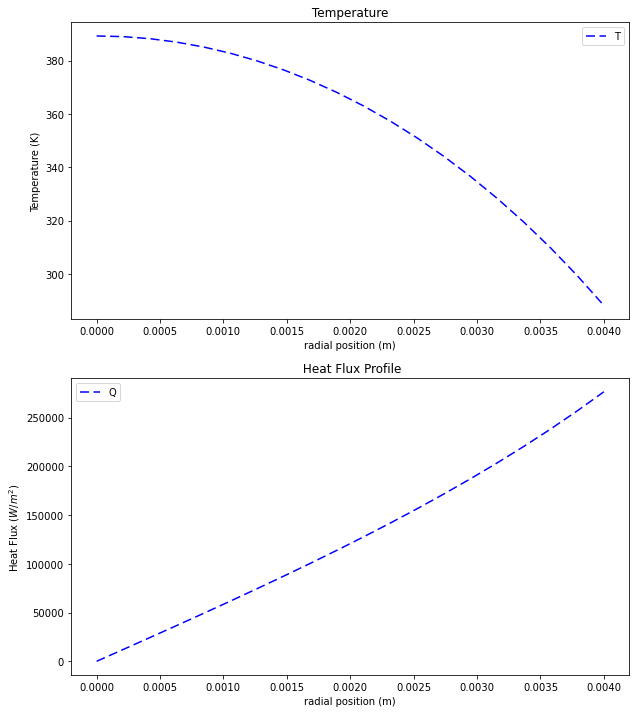

In [16]:
#plot the data
plt.figure(figsize=(10,12))

plt.subplot (2,1,1)
plt.plot(sol.t,sol.y[0],'b',label='T',dashes=[6, 3]) #sol.t is the independent variable r, 

plt.title(' Temperature ')
plt.xlabel('radial position (m)')
plt.ylabel('Temperature (K)')
plt.legend()

plt.subplot (2,1,2)
#plt.ylim(0, 0.01)
plt.plot(sol.t,Q,'b',label='Q',dashes=[6, 3])

plt.title(' Heat Flux Profile')
plt.xlabel('radial position (m)')
plt.ylabel('Heat Flux ($W/m^2$) ')
plt.legend()


# Now make a copy of this template and solve parts b and c


make a copy of this file using the command menu File; Make a Copy
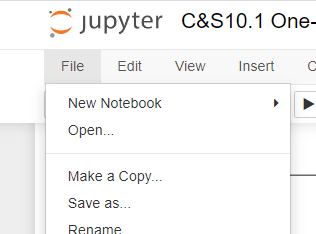

Hints that are given in the C&S problem statment <br>
(b) The wire surface has a heat transfer coefficient due to natural convection given by $h = 1.32\left(\frac{|\Delta T|}{D}\right)^{1/4}$, where $h$ is in $W/m^2·K$, $\Delta T$ is in K, and $D$ is in m. Calculate the heat flux at the wire surface and plot the temperature distribution within the wire. The temperature of the surroundings is $T_b$ = 15 °C = 288.15 K. The wire radius is $R_1 = 0.004 m$ and the total current is maintained at $i = 50 amps$.  So now instead of looking for a temperature you will look for the flux at the surface that equals $$Q_r|_{r=R_1}=h(T|_{r=R1}-288.15K)$$ The C&S text suggests that you set the $$err=Q_r|_{r=R_1}-h(T|_{r=R1}-288.15K)$$


(c) The wire with $i = 50 amps$ is covered by an insulating layer whose outer radius is $R_2 = 0.015 m$ and whose constant thermal conductivity is $k_I = 0.2 W/m·K$. Calculate the heat flux at the exterior surface of the insulation and plot the temperature distribution within the wire and the insulation layer. Comment on the use of insulation in this application.  The C&S text gives 3 equations that you must use for the insulation layer:  
$$\frac{d}{dr}(rQ_r)=0	\;\;\;\;\;\;R_1<r\le R_2$$
$$\frac{dT}{dr}=\frac{Q_r}{k_I}	\;\;\;\;\;\;R_1<r\le R_2$$
$$Q_r=\frac{(Q_rr)}{r}	\;\;\;\;\;\;R_1<r\le R_2$$
Use the boundary condition from part b.

# Reflections

1. Comment on the difference that the boundary conditions make on the heat loss from the wire between case a and b (Be quantitative; give a percent difference)
2. Comment on the difference the insulation makes on the heat loss or gain. Can you explain what you found? (Be quantitative; give a percent difference)